# Linear Regression


## Libraries

Will be using [Statsmodels](http://statsmodels.sourceforge.net/), a module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. Also [scikit-learn](http://scikit-learn.org/stable/), a module that provides simple and efficient tools for data mining and data analysis, is used. Scikit does not provide p-values for regressions but cross-validation.

In [1]:
# imports
import pandas as pd # data structures
import numpy as np # large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt # plotting library
from mpl_toolkits.mplot3d import Axes3D # 3d plots

import statsmodels.api as sm 
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.linear_model import LinearRegression


%matplotlib notebook

## Example: Advertising Data

First look at the data and then use linear regression to answer questions.

In [2]:
# read data into a Panda DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

In [5]:
# is there missing data?
data.isnull().values.any()

False

In [6]:
# some desciptive statictics
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# have a look at the data points with the largest sales
data[data.sales > 24]

,TV,radio,newspaper,sales
18,281.4,39.6,55.8,24.4
37,266.9,43.8,5.0,25.4
62,261.3,42.7,54.7,24.2
99,289.7,42.3,51.2,25.4
129,220.3,49.0,3.2,24.7
148,243.2,49.0,44.3,25.4
176,276.9,48.9,41.8,27.0
184,287.6,43.0,71.8,26.2
199,283.6,42.0,66.2,25.5


In [8]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<IPython.core.display.Javascript object>


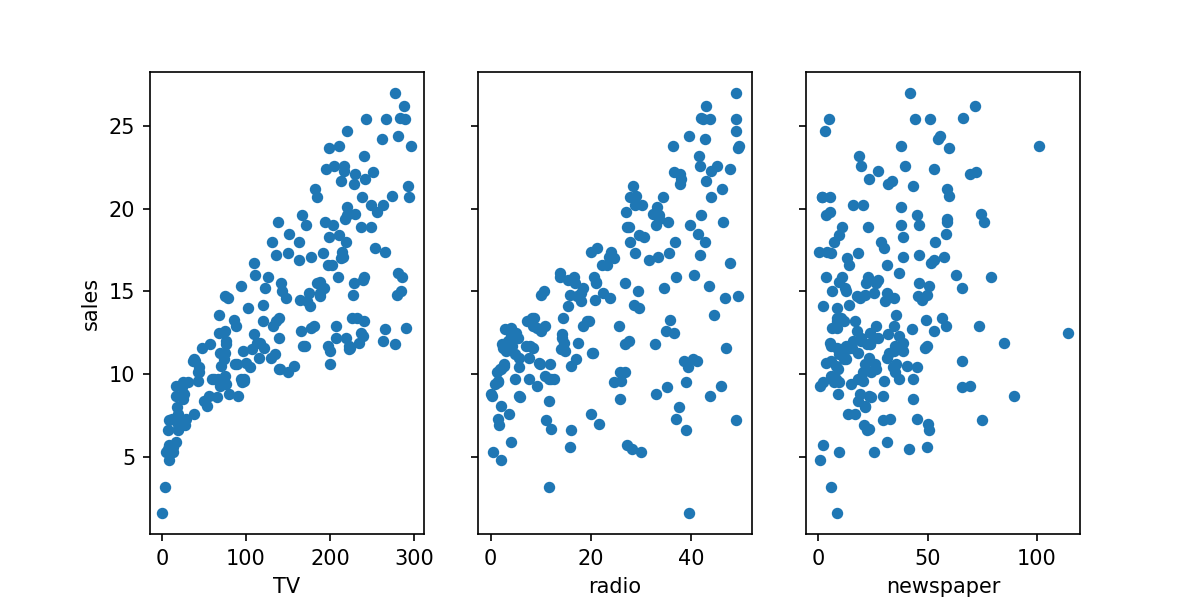

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(8, 4))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

<IPython.core.display.Javascript object>


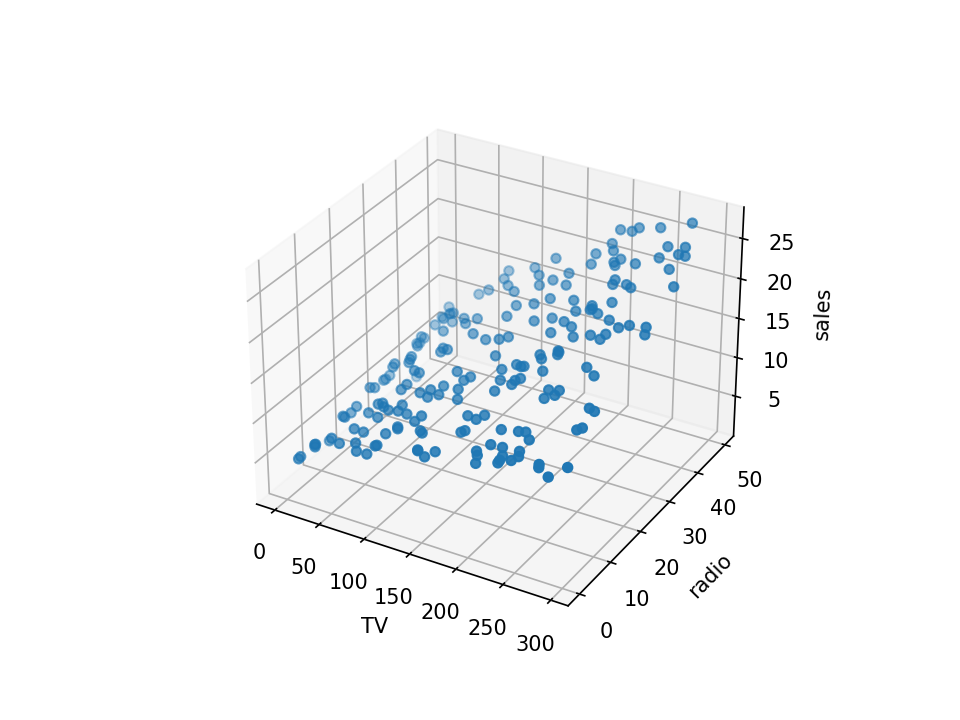

In [11]:


# this allows plots to appear directly in the notebook
%matplotlib notebook


#threedee = plt.figure().gca(projection='3d')
#threedee.scatter(data.TV, data.radio, data.sales)
fig = plt.figure()
threedee = fig.add_subplot(111, projection='3d')
threedee.scatter(data.TV, data.radio, data.sales)

threedee.set_xlabel('TV')
threedee.set_ylabel('radio')
threedee.set_zlabel('sales')

plt.show()


## Questions to answer by linear regression

1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

## Multiple Linear Regression

We estimate a model of the form:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

using Statsmodels.

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [12]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [13]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        10:57:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How do we interpret these coefficients? 

- TV and Radio have significant **p-values**
- Newspaper does not

<IPython.core.display.Javascript object>


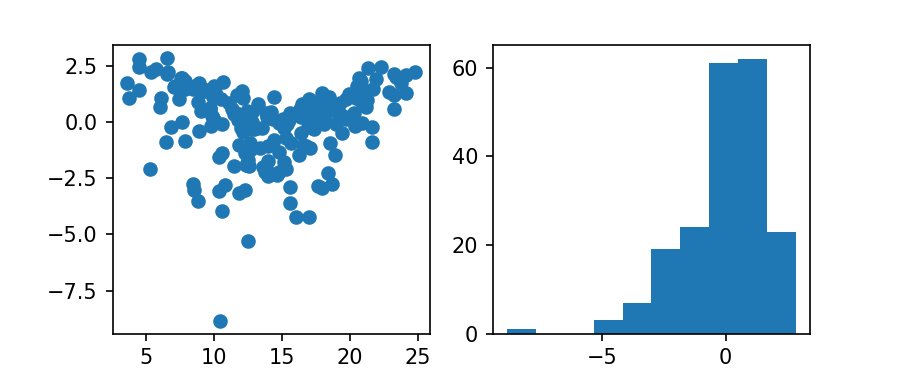

In [14]:
# look at the residuals
pred_val = lm.fittedvalues.copy()
true_val = data['sales'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(1,2,figsize=(6,2.5))
_ = ax[0].scatter(pred_val,residual)
_ = ax[1].hist(residual)



We see structure in the residual vs prediction plot

In [15]:
# prediction

predX=pd.DataFrame({'TV':[50], 'newspaper':[30], 'radio':[60]})

predictions=lm.get_prediction(predX)
predictions.summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16.507798,0.369443,15.779204,17.236391,13.104821,19.910775


## Feature Selection

Try different models

In [16]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [17]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

Lets try **Cross-validation.** Therefore we need the scikit-learn

In [18]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# just perform a linear regression in scikit
# note that p-values are not easily received in scikit

RegMod=linear_model.LinearRegression()

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X, y)
#print(lm.intercept_)
#print(lm.coef_)

list(zip(feature_cols, lm.coef_))



[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

In [19]:
# now try different models with 10-fold cross validation

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

cv_results = cross_validate(RegMod, X, y, cv=10, scoring='neg_mean_squared_error')
print('Modell', feature_cols,' MSE',-cv_results['test_score'].mean())

# create X and y
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

cv_results = cross_validate(RegMod, X, y, cv=10, scoring='neg_mean_squared_error')
print('Modell', feature_cols,' MSE',-cv_results['test_score'].mean())

# create X and y
feature_cols = ['TV', 'newspaper']
X = data[feature_cols]
y = data.sales

cv_results = cross_validate(RegMod, X, y, cv=10, scoring='neg_mean_squared_error')
print('Modell', feature_cols,' MSE',-cv_results['test_score'].mean())

# create X and y
feature_cols = ['radio', 'newspaper']
X = data[feature_cols]
y = data.sales

cv_results = cross_validate(RegMod, X, y, cv=10, scoring='neg_mean_squared_error')
print('Modell', feature_cols,' MSE',-cv_results['test_score'].mean())

# create X and y
feature_cols = ['radio']
X = data[feature_cols]
y = data.sales

cv_results = cross_validate(RegMod, X, y, cv=10, scoring='neg_mean_squared_error')
print('Modell', feature_cols,' MSE',-cv_results['test_score'].mean())

# create X and y
feature_cols = ['newspaper']
X = data[feature_cols]
y = data.sales

cv_results = cross_validate(RegMod, X, y, cv=10, scoring='neg_mean_squared_error')
print('Modell', feature_cols,' MSE',-cv_results['test_score'].mean())

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

cv_results = cross_validate(RegMod, X, y, cv=10, scoring='neg_mean_squared_error')
print('Modell', feature_cols,' MSE',-cv_results['test_score'].mean())

Modell ['TV', 'radio', 'newspaper']  MSE 3.059967618118513
Modell ['TV', 'radio']  MSE 3.0139191555404694
Modell ['TV', 'newspaper']  MSE 9.891546900360186
Modell ['radio', 'newspaper']  MSE 19.04730013282136
Modell ['radio']  MSE 18.66590327666571
Modell ['newspaper']  MSE 26.072240507630806
Modell ['TV']  MSE 10.782515281338029


## Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?
Let's create a fake dummy.

In [20]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [21]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [22]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.045719820924362775),
 ('radio', 0.1887281431342787),
 ('newspaper', -0.0010976794483516079),
 ('IsLarge', 0.0574238508548277)]


# Boston house prices dataset

In [23]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
print(boston.feature_names)
print(boston.data.shape)




dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


In [24]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
# now convert it to Panda format
bopd = pd.DataFrame(boston.data)
bopd.columns = boston.feature_names
bopd['PRICE'] = boston.target
bopd.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
bopd.isnull().values.any()

False

In [27]:
print(bopd.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

<IPython.core.display.Javascript object>


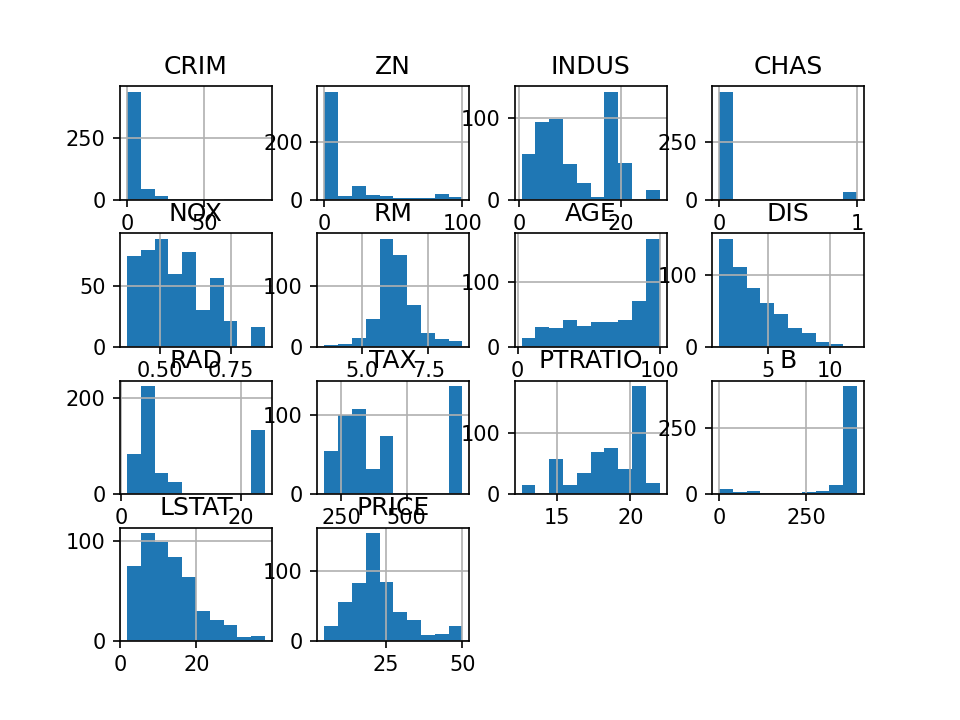

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'PRICE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [28]:
bopd.hist()

In [29]:
# create a fitted model with all three features
lm = smf.ols(formula='PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + B + TAX + PTRATIO + LSTAT', data=bopd).fit()

# print the coefficients
lm.params

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          6.72e-135
Time:                        10:59:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
B              0.0093      0.003      3.467      0.001       0.004       0.015
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>


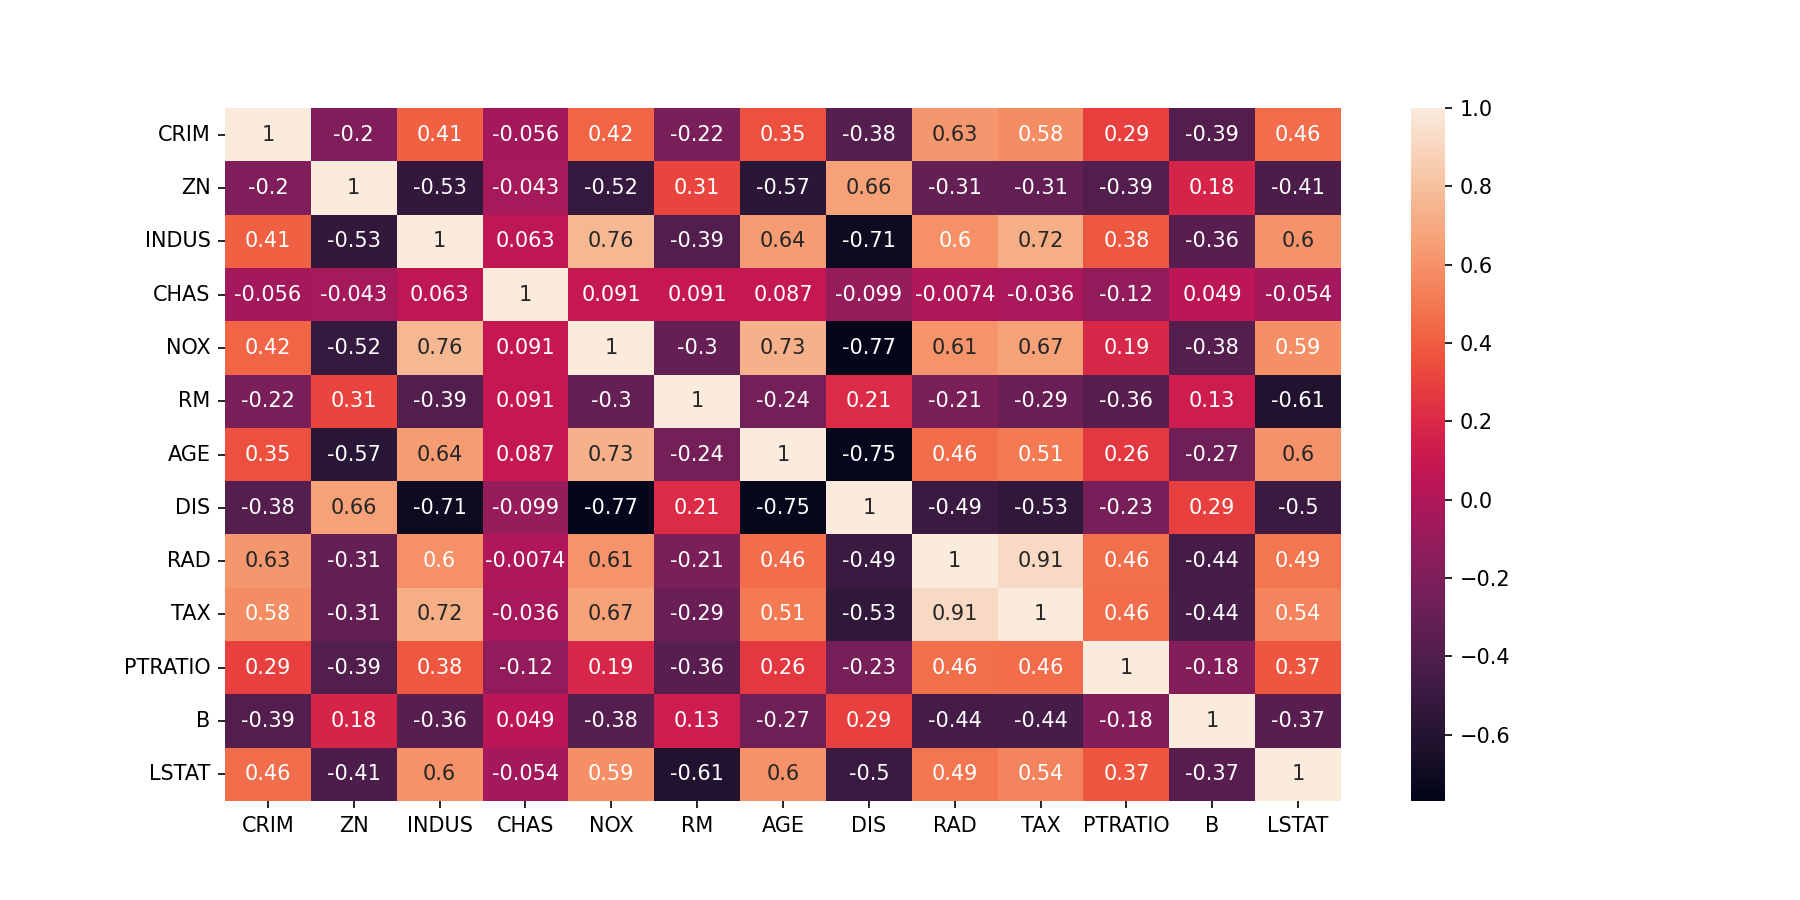

<AxesSubplot:>

In [48]:
plt.figure(figsize = (12,6))
sns.heatmap(bopd.corr(),annot = True)

In [31]:
# create a fitted model with all three features
lm = smf.ols(formula='PRICE ~ CHAS + RM + PTRATIO + LSTAT', data=bopd).fit()

# print the coefficients
lm.params

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          5.11e-125
Time:                        10:59:23   Log-Likelihood:                -1546.0
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1364      3.864      4.693      0.000      10.544      25.729
CHAS           3.4371      0.913      3.766      0.000       1.644       5.230
RM             4.4264      0.421     10.513      0.000       3.599       5.254
PTRATIO       -0.8874      0.117     -7.604      0.000      -1.117      -0.658
LSTAT         -0.5755      0.042    -13.802      0.000      -0.657      -0.494
==============================================================================
Omnibus:                      182.152   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.597
Skew:                           1.539   Prob(JB):                    2.40e-184
Kurtosis:                       8.534   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Classification Example

Now we try to fit classification models in order to predict whether a given suburb has a crime rate above or below the median.
We use logistic regression and KNN. Of course also here subsets of predictors should normally be tried out.

In [37]:
from sklearn.model_selection import train_test_split

bopd = pd.DataFrame(boston.data)
bopd.columns = boston.feature_names
print(bopd.describe())

# Select features
features = boston.feature_names[boston.feature_names != "CRIM"]
#features = ["ZN", "INDUS", "CHAS", "RM", "AGE", "DIS", "RAD"]

# Target is here if we are above or below the crime median
y_data = np.zeros_like(bopd[["CRIM"]], dtype=bool)
y_data[bopd[["CRIM"]] > bopd[["CRIM"]].median()] = True  # True: above, False: below

# Create train and test splits
x_train, x_test, y_train, y_test = train_test_split(bopd[[*features]], y_data, test_size=0.3)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [38]:
from statsmodels.api import Logit

log_reg = Logit(y_train, x_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.247255
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  354
Model:                          Logit   Df Residuals:                      342
Method:                           MLE   Df Model:                           11
Date:                Tue, 04 Oct 2022   Pseudo R-squ.:                  0.6432
Time:                        11:00:21   Log-Likelihood:                -87.528
converged:                       True   LL-Null:                       -245.32
Covariance Type:            nonrobust   LLR p-value:                 4.525e-61
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ZN            -0.0484      0.028     -1.760      0.078      -0.102       0.005
INDUS         -0.0005      0.045     -0.011      0.991      -0.088       0.087
CHAS           0.1540      0.833      0.185      0.853      -1.479       1.787
NOX           22.0668      5.670      3.892      0.000      10.954      33.180
RM            -0.3286      0.395     -0.833      0.405      -1.102       0.445
AGE            0.0136      0.012      1.185      0.236      -0.009       0.036
DIS            0.0166      0.181      0.092      0.927      -0.337       0.371
RAD            0.6218      0.156      3.997      0.000       0.317       0.927
TAX           -0.0062      0.003     -2.413      0.016      -0.011      -0.001
PTRATIO       -0.0041      0.103     -0.040      0.968      -0.207       0.198
B             -0.0287      0.009     -3.369      0.001      -0.045      -0.012
LSTAT         -0.0802      0.053     -1.502      0.133      -0.185       0.024
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

pred = log_reg.predict(x_test)
cmat = confusion_matrix(y_test, pred > 0.5).T
err = np.mean((pred > 0.5) != y_test.ravel())
print(f"Confusion matrix: \n{cmat}\n")
print(f"Test error: {100 * err:.2f}%\n")
print(classification_report(y_test, pred > 0.5, digits=3))

Confusion matrix: 
[[75 17]
 [ 4 56]]

Test error: 13.82%

              precision    recall  f1-score   support

       False      0.815     0.949     0.877        79
        True      0.933     0.767     0.842        73

    accuracy                          0.862       152
   macro avg      0.874     0.858     0.860       152
weighted avg      0.872     0.862     0.860       152



<IPython.core.display.Javascript object>


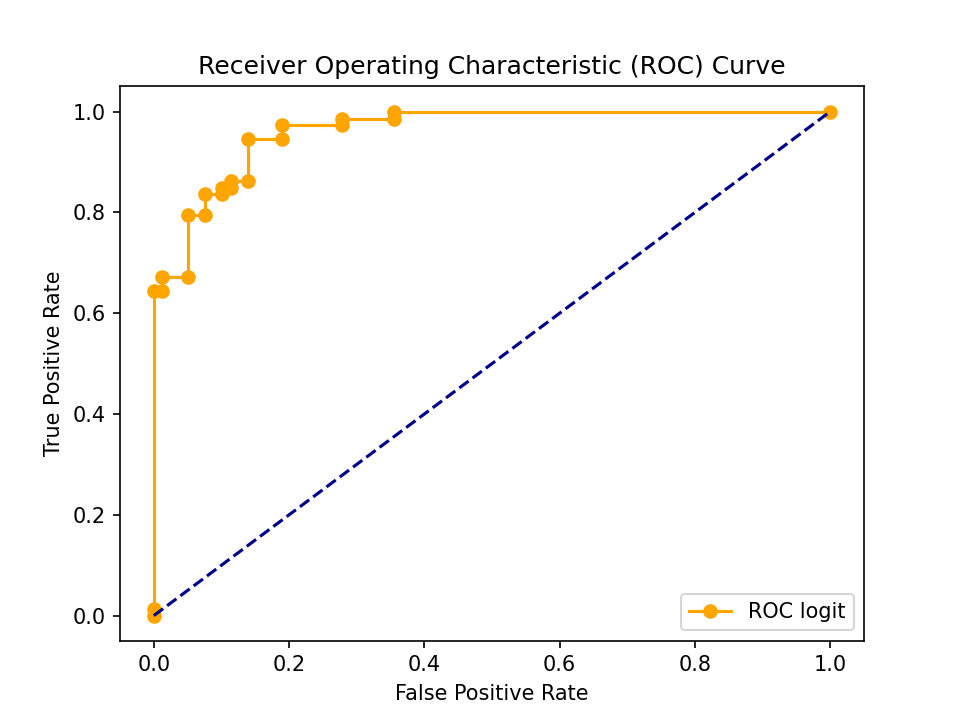

In [47]:
from sklearn.metrics import roc_curve  

import matplotlib.pyplot as plt

plt.figure()
    
fper, tper, thresholds = roc_curve(y_test, pred) 


plt.plot(fper, tper, color='orange', label='ROC logit', linestyle='-', marker='o')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [36]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train.ravel())
predknn = knn.predict(x_test)
cmatknn = confusion_matrix(y_test, predknn).T
errknn = np.mean(predknn != y_test.ravel())
print(f"Confusion matrix: \n{cmatknn}\n")
print(f"Test error: {100 * errknn:.2f}%\n")
print(classification_report(y_test, predknn, digits=3))

fperknn, tperknn, thresholdsknn = roc_curve(y_test, predknn*1)

plt.plot(fperknn, tperknn, color='Magenta', label='ROC knn', marker='o')
plt.legend()

Confusion matrix: 
[[69  6]
 [ 4 73]]

Test error: 6.58%

              precision    recall  f1-score   support

       False      0.920     0.945     0.932        73
        True      0.948     0.924     0.936        79

    accuracy                          0.934       152
   macro avg      0.934     0.935     0.934       152
weighted avg      0.935     0.934     0.934       152

